Objectives: 

Your objective is to build a series of scatter plots to showcase the following relationships:

Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude

Your final notebook must:

Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number, city name, and requested URL.
Save both a CSV of all data retrieved and png images for each scatter plot.


As final considerations:

You must use the Matplotlib and Seaborn libraries.
You must include a written description of three observable trends based on the data.
You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
You must include an exported markdown version of your Notebook called  README.md in your GitHub repository.
See Example Solution for a reference on expected format.

In [1]:
#dependencies
import os
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from citipy import citipy
import random
from datetime import datetime
import requests
from random import uniform
#API keys
#OpenWeather API Key
from config import api_key1
#Google API Key
from config import api_key2

In [2]:
#Method 1 - randomly generating coordinates, however I only receive 1 city, seek alternative methods.
#rand_city = []
#while len(rand_city) <= 500:
#for x in range (0,500):
#    for y in range(0,500):
#        x,y = uniform(-180,180), uniform(-90, 90)
        
#rand_city_name = citipy.nearest_city(x,y).city_name

#print(rand_city_name)
#rand_city.append(random_city_name)
#rand_city

In [3]:
#Method 2 - develop pd data frame

#500 random cities

city = []
country = []
latitude=[]
longitude = []


location_data = pd.DataFrame()

#generate coordinates
location_data['latitude'] = [np.random.uniform(-90,90) for x in range(1500)]
location_data['longitude'] = [np.random.uniform(-180, 180) for x in range(1500)]

#develop columns & spot check
location_data[city] = ''
location_data[country] = ''
location_data[latitude] = ''
location_data[longitude] = ''

#location_data

#Add City & Country

for index, row in location_data.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    location_data.set_value(index, 'city', citipy.nearest_city(latitude, longitude).city_name)
    location_data.set_value(index, 'country', citipy.nearest_city(latitude, longitude).country_code)

#require unique values so check for duplicates
#drop_duplicates - https://stackoverflow.com/questions/23667369/drop-all-duplicate-rows-in-python-pandas
location_data = location_data.drop_duplicates(['city', 'country'])
location_data = location_data.dropna()    

print(len(location_data['city'].value_counts()))
location_data.head()

/Users/cdw004/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/cdw004/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


605


,latitude,longitude,city,country
0,22.179579,52.596091,abu dhabi,ae
1,17.783145,-132.161067,lompoc,us
2,48.280493,49.739156,inderborskiy,kz
3,-71.939904,-20.524464,mar del plata,ar
4,17.468411,39.259181,tawkar,sd


In [4]:
city.append(location_data['city'])
country.append(location_data['country'])
print(city)

[0                       abu dhabi
1                          lompoc
2                    inderborskiy
3                   mar del plata
4                          tawkar
5                         rikitea
6                     morgan city
7                           vaini
9                      port blair
10                   punta arenas
11                        ushuaia
12                        mataura
13               illoqqortoormiut
15                     bredasdorp
17                          bluff
18                       shintomi
20         santa maria da vitoria
21                        qaanaaq
22                      jamestown
23                    port alfred
26                         albany
27                      cape town
28                 ribeira grande
29                       solbjerg
30                          ancud
31                          ikeda
32                       matagami
35                       hermanus
36                      dongsheng
37           

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"

apikey = api_key1
units = "Imperial"
count = 0

location_data['temperature'] = ""
location_data['humidity'] = ""
location_data['cloudiness'] = ""
location_data['wind_speed'] = ""

for index,row in location_data.iterrows():
    count+= 1
    query_url = url + "appid=" + apikey + "&units=" + units + "&q=" + row['city']

    try:
        weather_response = requests.get(query_url)
        weather = weather_response.json()
#         print(cityweather)

        location_data.set_value(index, "temperature", int(weather['main']['temp']))
        location_data.set_value(index, "humidity", int(weather['main']['humidity']))
        location_data.set_value(index, "cloudiness", int(weather['clouds']['all']))
        location_data.set_value(index, "wind_speed", int(weather['wind']['speed']))
    except:
        print("No data for this city: {row['city']}")
        location_data.drop([index])
        
    print(f"City#: {count}")
    print(f"City Name: {row['city']}" )
    print(f"URL: {query_url}")

/Users/cdw004/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/cdw004/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/cdw004/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/cdw004/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


City#: 1
City Name: abu dhabi
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=abu dhabi
City#: 2
City Name: lompoc
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=lompoc
No data for this city: {row['city']}
City#: 3
City Name: inderborskiy
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=inderborskiy
City#: 4
City Name: mar del plata
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=mar del plata
No data for this city: {row['city']}
City#: 5
City Name: tawkar
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=tawkar
City#: 6
City Name: rikitea
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=rikitea
City#: 7
City Name: morgan city
URL: htt

City#: 55
City Name: dzilam gonzalez
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=dzilam gonzalez
City#: 56
City Name: east london
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=east london
City#: 57
City Name: pacifica
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=pacifica
City#: 58
City Name: barentu
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=barentu
City#: 59
City Name: conde
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=conde
No data for this city: {row['city']}
City#: 60
City Name: taolanaro
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=taolanaro
City#: 61
City Name: safford
URL: http://api.openweathermap.org/dat

No data for this city: {row['city']}
City#: 108
City Name: samusu
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=samusu
City#: 109
City Name: kodiak
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=kodiak
City#: 110
City Name: tessalit
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=tessalit
City#: 111
City Name: hithadhoo
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=hithadhoo
City#: 112
City Name: khadyzhensk
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=khadyzhensk
City#: 113
City Name: ahipara
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=ahipara
City#: 114
City Name: tasiilaq
URL: http://api.openweathermap.org/data/2.5/we

City#: 162
City Name: ollioules
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=ollioules
City#: 163
City Name: upernavik
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=upernavik
City#: 164
City Name: lorengau
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=lorengau
No data for this city: {row['city']}
City#: 165
City Name: barbar
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=barbar
City#: 166
City Name: zhigansk
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=zhigansk
City#: 167
City Name: changuinola
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=changuinola
No data for this city: {row['city']}
City#: 168
City Name: grand rive

No data for this city: {row['city']}
City#: 216
City Name: svetlyy
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=svetlyy
City#: 217
City Name: amga
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=amga
City#: 218
City Name: cabo san lucas
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=cabo san lucas
City#: 219
City Name: kysyl-syr
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=kysyl-syr
City#: 220
City Name: aitape
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=aitape
City#: 221
City Name: saint-francois
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=saint-francois
City#: 222
City Name: poum
URL: http://api.openweathermap.org/d

No data for this city: {row['city']}
City#: 271
City Name: bac lieu
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=bac lieu
City#: 272
City Name: chokurdakh
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=chokurdakh
City#: 273
City Name: araouane
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=araouane
No data for this city: {row['city']}
City#: 274
City Name: kuah
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=kuah
City#: 275
City Name: catuday
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=catuday
City#: 276
City Name: sedkyrkeshch
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=sedkyrkeshch
City#: 277
City Name: grand-lahou
UR

City#: 324
City Name: ngunguru
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=ngunguru
City#: 325
City Name: ouallam
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=ouallam
City#: 326
City Name: anjangaon
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=anjangaon
City#: 327
City Name: geraldton
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=geraldton
City#: 328
City Name: evensk
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=evensk
City#: 329
City Name: anadyr
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=anadyr
City#: 330
City Name: sioux lookout
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f3

City#: 378
City Name: kawalu
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=kawalu
City#: 379
City Name: groningen
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=groningen
City#: 380
City Name: barra patuca
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=barra patuca
City#: 381
City Name: cizre
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=cizre
City#: 382
City Name: dubrovnik
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=dubrovnik
City#: 383
City Name: fortuna
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=fortuna
City#: 384
City Name: sinnamary
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44

City#: 434
City Name: naze
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=naze
City#: 435
City Name: alexandria
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=alexandria
City#: 436
City Name: axim
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=axim
City#: 437
City Name: springdale
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=springdale
City#: 438
City Name: bathsheba
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=bathsheba
City#: 439
City Name: stourbridge
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=stourbridge
City#: 440
City Name: san juan
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f

City#: 489
City Name: goderich
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=goderich
City#: 490
City Name: jumla
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=jumla
No data for this city: {row['city']}
City#: 491
City Name: zhitikara
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=zhitikara
No data for this city: {row['city']}
City#: 492
City Name: chikoy
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=chikoy
City#: 493
City Name: grand forks
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=grand forks
City#: 494
City Name: quatre cocos
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=quatre cocos
City#: 495
City Name: tombouctou

City#: 543
City Name: nouakchott
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=nouakchott
City#: 544
City Name: dwarka
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=dwarka
City#: 545
City Name: bytow
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=bytow
City#: 546
City Name: beringovskiy
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=beringovskiy
City#: 547
City Name: madras
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=madras
City#: 548
City Name: sambava
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=sambava
City#: 549
City Name: presidencia roque saenz pena
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285

City#: 598
City Name: maralal
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=maralal
City#: 599
City Name: salalah
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=salalah
City#: 600
City Name: sobolevo
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=sobolevo
City#: 601
City Name: kokoda
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=kokoda
City#: 602
City Name: dingzhou
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=dingzhou
City#: 603
City Name: igunga
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee69883&units=Imperial&q=igunga
City#: 604
City Name: batemans bay
URL: http://api.openweathermap.org/data/2.5/weather?appid=13eb285e756e4390109c44f34ee6988

In [7]:
#test data
#location_data['temperature']
#location_data['humidity'] 
#location_data['cloudiness']
#location_data['wind_speed'] 
#location_data.head()
#NOTE BLANK CELLS - DELETE: https://stackoverflow.com/questions/29314033/python-pandas-dataframe-remove-empty-cells
location_update = location_data.replace('', np.nan, inplace=True)
location_update = location_data.dropna()   
location_update.head()
print(len(location_update))
location_update

544


,latitude,longitude,city,country,temperature,humidity,cloudiness,wind_speed
0,22.179579,52.596091,abu dhabi,ae,72.0,53.0,0.0,8.0
1,17.783145,-132.161067,lompoc,us,58.0,47.0,1.0,11.0
3,-71.939904,-20.524464,mar del plata,ar,67.0,41.0,68.0,29.0
5,-60.765482,-116.577137,rikitea,pf,80.0,100.0,56.0,14.0
6,28.617038,-91.546826,morgan city,us,77.0,78.0,90.0,14.0
7,-82.080262,-178.843105,vaini,to,66.0,91.0,8.0,2.0
9,11.626859,92.334210,port blair,in,82.0,100.0,0.0,9.0
10,-77.615603,-86.826217,punta arenas,cl,46.0,100.0,75.0,26.0
11,-68.923262,-66.663244,ushuaia,ar,41.0,80.0,75.0,20.0
12,-78.236913,-143.232160,mataura,pf,66.0,64.0,100.0,17.0


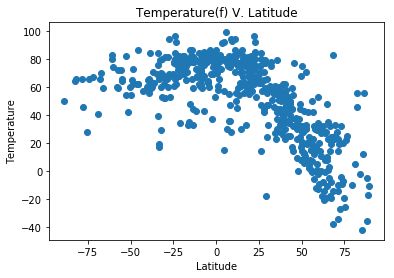

In [19]:
plt.scatter(location_update['latitude'], location_update['temperature'])
plt.title("Temperature(f) V. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("Temp_v_Latitude.png")

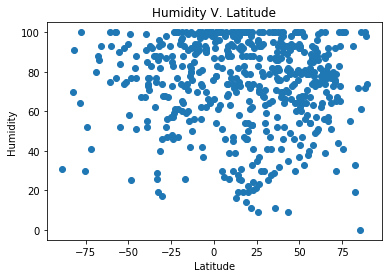

In [20]:
plt.scatter(location_update['latitude'], location_update['humidity'])
plt.title("Humidity V. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Humidity_v_Latitude.png")

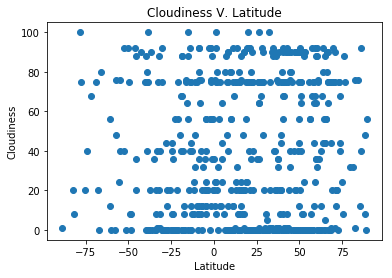

In [21]:
plt.scatter(location_update['latitude'], location_update['cloudiness'])
plt.title("Cloudiness V. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Cloudiness_v_Latitude.png")

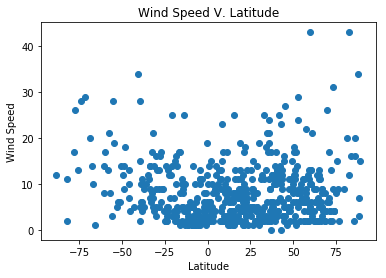

In [22]:
plt.scatter(location_update['latitude'], location_update['wind_speed'])
plt.title("Wind Speed V. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Wind_v_Latitude.png")

In [23]:
location_update.to_csv('Cities.csv')

In [26]:
location_update

,latitude,longitude,city,country,temperature,humidity,cloudiness,wind_speed
0,22.179579,52.596091,abu dhabi,ae,72.0,53.0,0.0,8.0
1,17.783145,-132.161067,lompoc,us,58.0,47.0,1.0,11.0
3,-71.939904,-20.524464,mar del plata,ar,67.0,41.0,68.0,29.0
5,-60.765482,-116.577137,rikitea,pf,80.0,100.0,56.0,14.0
6,28.617038,-91.546826,morgan city,us,77.0,78.0,90.0,14.0
7,-82.080262,-178.843105,vaini,to,66.0,91.0,8.0,2.0
9,11.626859,92.334210,port blair,in,82.0,100.0,0.0,9.0
10,-77.615603,-86.826217,punta arenas,cl,46.0,100.0,75.0,26.0
11,-68.923262,-66.663244,ushuaia,ar,41.0,80.0,75.0,20.0
12,-78.236913,-143.232160,mataura,pf,66.0,64.0,100.0,17.0


In [29]:
#plt.scatter(location_update['longitude'], location_update['cloudiness'])
#plt.title("Cloudiness V. Longitude")
#plt.xlabel("Longitude")
#plt.ylabel("Cloudiness")

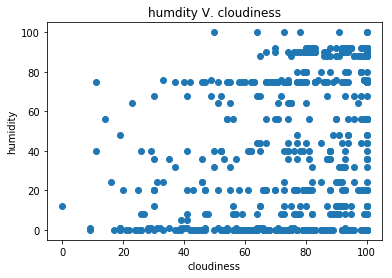

In [37]:
plt.scatter(location_update['humidity'], location_update['cloudiness'])
plt.title("humdity V. cloudiness")
plt.xlabel("cloudiness")
plt.ylabel("humidity")
plt.savefig("Wind_v_Latitude.png")
plt.savefig("Humidity_V_Cloudiness.png")